In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("alternating_data.csv", header=0, quotechar='"', encoding="utf-8")

In [ ]:
print(df['cleaned_text'].isnull().sum())
df.isnull().sum()

0


,0
cleaned_text,0
label,0


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,cleaned_text,label
0,kumpulan judi slot online tembak ikan online t...,1
1,vivacoid berita terkini informasi terbaru nasi...,0
2,iboplay iboplay produk membantu anakanak belaj...,1
3,universitas negeri padang official website uni...,0
4,ibosport situs slot gacor gampang menang maxwi...,1


In [ ]:
# Tokenisasi
tokenized_sentences = df['cleaned_text'].apply(lambda x: x.split()).tolist()

print("Contoh tokenized sentences:")
print(tokenized_sentences[:5])  # 5 baris pertama

Contoh tokenized sentences:
[['kumpulan', 'judi', 'slot', 'online', 'tembak', 'ikan', 'online', 'togel', 'online', 'casino', 'online', 'bola', 'online', 'terbaik', 'kumpulan', 'judi', 'slot', 'online', 'poker', 'online', 'togel', 'online', 'casino', 'online', 'bola', 'online', 'terbaik', 'terpercaya', 'indonesia', 'ibomacau', 'judi', 'slot', 'online', 'judi', 'poker', 'online', 'judi', 'togel', 'online', 'judi', 'casino', 'online', 'judi', 'bola', 'online', 'agen', 'judi', 'slot', 'agen', 'judi', 'poker', 'agen', 'judi', 'togel', 'agen', 'judi', 'casino', 'agen', 'judi', 'bola', 'bandar', 'judi', 'slot', 'bandar', 'judi', 'poker', 'bandar', 'judi', 'togel', 'bandar', 'judi', 'casino', 'bandar', 'judi', 'bola'], ['vivacoid', 'berita', 'terkini', 'informasi', 'terbaru', 'nasional', 'internasional', 'vivacoid', 'berita', 'terbaru', 'nasional', 'mancanegara', 'terkait', 'isu', 'terkini', 'menyajikan', 'berita', 'lokal', 'olahraga', 'bisnis', 'politik', 'peristiwa', 'trending', 'gosip', 'ar

In [ ]:
from gensim.models import Word2Vec

# Latih Word2Vec
w2v_model = Word2Vec(
    sentences=tokenized_sentences,  # Data tokenized sentences
    vector_size=100,               # Dimensi embedding
    window=5,                      # Window size (konteks kata)
    min_count=5,                   # Kata dengan frekuensi rendah akan diabaikan
    workers=4,                     # Jumlah thread
    sg=1                           # Gunakan Skip-Gram (0 untuk CBOW)
)

# Simpan model Word2Vec
w2v_model.save("word2vec_model.model")

print("Word2Vec model berhasil dibuat!")

Word2Vec model berhasil dibuat!


In [ ]:
print("Kata yang mirip dengan 'judi':")
print(w2v_model.wv.most_similar("judi", topn=100))

Kata yang mirip dengan 'judi':
[('amalbet', 0.9346467852592468), ('parlay', 0.9239897131919861), ('gacorbos88', 0.9232689738273621), ('amanbola', 0.92324298620224), ('mix', 0.9227603673934937), ('idnslot', 0.9226413369178772), ('idnplay', 0.919431746006012), ('agen', 0.918895423412323), ('lapakbo', 0.9168636202812195), ('dewacasino', 0.9161137342453003), ('online24jam', 0.9060172438621521), ('vodka138', 0.9059266448020935), ('togelmandiri', 0.905599057674408), ('eyangpoker', 0.9049637913703918), ('afapoker', 0.9031627178192139), ('taruhan', 0.9031580686569214), ('dewi365', 0.9026783108711243), ('sepakbolacc', 0.901847779750824), ('8togel', 0.9014432430267334), ('flyingslot', 0.9002019166946411), ('rgobet', 0.8998932838439941), ('teraman', 0.898817777633667), ('sabung', 0.8976759910583496), ('pokerboya', 0.8974166512489319), ('eyangtogel', 0.8968868255615234), ('togelcc', 0.896359920501709), ('brotogel', 0.8962373733520508), ('dewabet', 0.894637942314148), ('idn', 0.8944967985153198), (

In [ ]:
print("Embedding untuk kata 'judi':")
print(w2v_model.wv['judi'])

Embedding untuk kata 'judi':
[ 0.12963971  0.13605557  0.29783547  0.20265569 -0.10172204 -0.44294575
  0.2626636   0.5668098  -0.42937154 -0.09921011 -0.19502227 -0.5139995
  0.01390054  0.30548877 -0.3225425   0.13672976  0.53611284 -0.10464051
 -0.0265127  -0.6607717   0.64420164  0.39673057  0.7189964  -0.35474384
 -0.1503429   0.286694   -0.2167464   0.18145137 -0.3133284   0.5241439
  0.34979483 -0.28685653  0.344903   -0.6241016  -0.04775852  0.13949487
  0.25232702  0.14799534 -0.6143171  -0.7751618   0.08125044 -0.13359435
  0.03019761  0.37216288  0.32031488 -0.6292662  -0.45276418 -0.15147756
  0.45018792  0.06046985 -0.3193292  -0.2518133  -0.02178635 -0.41507468
 -0.26629004  0.05933205 -0.01017676 -0.08609907 -0.45718807  0.07744448
  0.5298446   0.00659839  0.41173875  0.4880518  -0.24018346  0.2807883
  0.09987705  0.31531507 -0.53187203  0.39486614  0.26026338  0.07782381
  0.02638437 -0.00958126  0.21403113 -0.01492261  0.22784708  0.12182201
  0.1678481  -0.6029855  

In [ ]:
# Simpan embedding dalam format teks
w2v_model.wv.save_word2vec_format('word2vec_embeddings.txt', binary=False)

In [ ]:
import numpy as np

# Vocabulary Word2Vec
vocab_size = len(w2v_model.wv)
embedding_dim = 100  # Dimensi embedding Word2Vec

# Buat embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
word_index = {word: i for i, word in enumerate(w2v_model.wv.index_to_key)}

for word, i in word_index.items():
    embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
X = df['cleaned_text']  # menggunakan cleaned_text sebagai fitur
y = df['label']        # menggunakan kolom label

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% untuk testing
    random_state=42,    # untuk reproducibility
    stratify=y         # untuk memastikan distribusi kelas seimbang
)

In [ ]:
tokenizer = Tokenizer(num_words=10000)  # membatasi vocabulary size
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
maxlen = 100  # panjang maksimum sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
maxlen = 100  # panjang maksimum sequence
tokenizer = Tokenizer(num_words=10000)  # membatasi vocabulary size
tokenizer.fit_on_texts(df['cleaned_text'])

In [ ]:
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=maxlen)
y = df['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: 1.0, 1: 1.0}


In [ ]:
model = Sequential([
    # Embedding layer dengan pre-trained Word2Vec weights
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False  # Freeze embedding layer
    ),

    # BiLSTM layers
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),

    Bidirectional(LSTM(32)),
    Dropout(0.3),

    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')
])

In [ ]:
from keras.metrics import Precision, Recall, AUC

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
)

# Tampilkan summary model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,695,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,695,500 (6.47 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,695,500 (6.47 MB)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_precision',  # Monitor precision pada validasi
    patience=3,
    restore_best_weights=True,
    mode='max'
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8950 - auc: 0.9447 - loss: 0.3579 - precision: 0.9536 - recall: 0.8242 - val_accuracy: 0.9898 - val_auc: 0.9995 - val_loss: 0.0389 - val_precision: 0.9971 - val_recall: 0.9829
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9689 - auc: 0.9850 - loss: 0.1133 - precision: 0.9782 - recall: 0.9578 - val_accuracy: 0.9868 - val_auc: 0.9996 - val_loss: 0.0335 - val_precision: 0.9858 - val_recall: 0.9886
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9743 - auc: 0.9923 - loss: 0.0834 - precision: 0.9804 - recall: 0.9686 - val_accuracy: 0.9839 - val_auc: 0.9995 - val_loss: 0.0437 - val_precision: 0.9802 - val_recall: 0.9886
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9745 - auc: 0.9927 - loss: 0.0877 - precision: 0.9823 - recall: 0.9678 - val_accuracy: 0.9883 - val_auc: 0.9992 - val_loss: 0.0387 - val_precision: 0.9886 - val_recall: 0.9886


In [ ]:
# Prediksi
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       427
           1       0.99      0.95      0.97       428

    accuracy                           0.97       855
   macro avg       0.97      0.97      0.97       855
weighted avg       0.97      0.97      0.97       855


Confusion Matrix:
[[421   6]
 [ 21 407]]


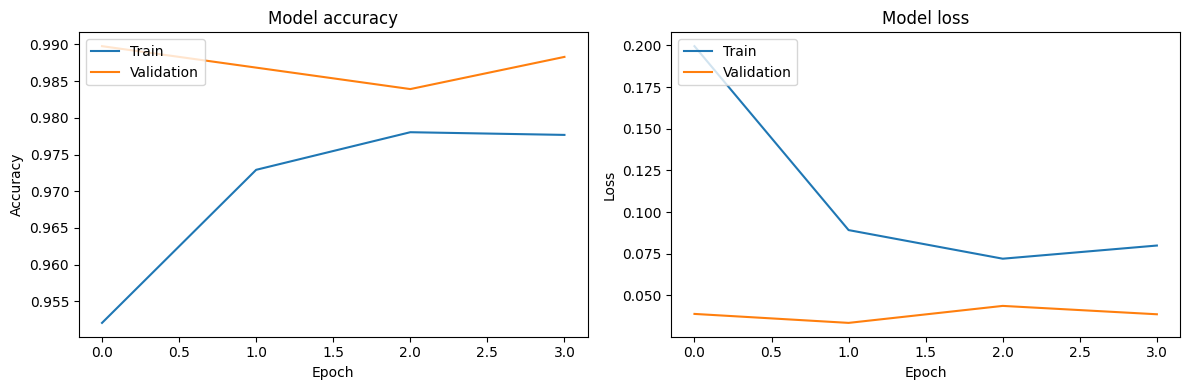

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
# Simpan model
model.save('gambling_detection_model_new_balanced.h5')

# Simpan tokenizer
import pickle
with open('tokenizer_new_balanced.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

print("Model dan tokenizer berhasil disimpan!")

Model dan tokenizer berhasil disimpan!


In [ ]:
def predict_text(text):
    # Preprocessing
    # Gunakan preprocessing yang sama dengan data training

    # Tokenisasi dan padding
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=maxlen)

    # Prediksi
    prediction = model.predict(padded)[0][0]

    return {
        'text': text,
        'probability': float(prediction),
        'prediction': 'Judi Online' if prediction > 0.5 else 'Bukan Judi Online'
    }

# Contoh penggunaan
# test_text = "kominfo melakukan pemblokiran website judi online" #hasilnya bukan
# test_text = "pemerintah indonesia melakukan pemblokiran terhadap 2000 website judi online" # hasilnya bukan
# test_test = "pemerintah berhasil indonesia melakukan pemblokiran terhadap 2 juta website judi online" #hasilnya bukan
# test_text = "website resmi di indonesia dijamin maxwin"
# test_text = "website resmi di indonesia dijamin menang"
test_text = "Sekolah Tinggi Manajemen Informatika & Komputer (STMIK Bandung) Sekolah Tinggi Manajemen Informatika & Komputer (STMIK Bandung)"
result = predict_text(test_text)
print("\nHasil Prediksi:")
print(f"Teks: {result['text']}")
print(f"Probabilitas: {result['probability']:.4f}")
print(f"Prediksi: {result['prediction']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Hasil Prediksi:
Teks: Sekolah Tinggi Manajemen Informatika & Komputer (STMIK Bandung) Sekolah Tinggi Manajemen Informatika & Komputer (STMIK Bandung)
Probabilitas: 0.0044
Prediksi: Bukan Judi Online
